# Exercises

In [20]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
diamonds = pd.read_csv('diamonds.csv',index_col=0)

### Task 1: Find all the diamonds with more than 2 carat and plot their price distribution in a histogram

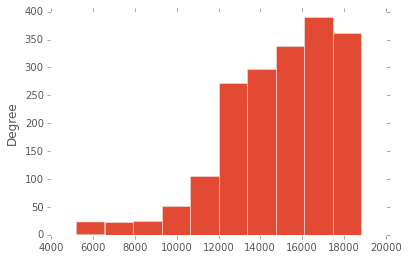

In [26]:
diamonds
d = diamonds[diamonds['carat']>2]
d.sort('carat')
d['price'].plot(kind = 'hist')


### Task 2: compute and plot the standard deviation of the x dimension for the different cuts

,carat,depth,table,price,x,y,z
cut,,,,,,,
Fair,0.516404,3.643428,3.946261,3560.386496,0.964317,0.956380,0.651638
Good,0.454054,2.169374,2.851300,3681.589467,1.057301,1.051535,0.654893
Ideal,0.432876,0.718539,1.246423,3808.401108,1.064210,1.074495,0.657648
Premium,0.515262,1.158815,1.478573,4349.204870,1.188252,1.259751,0.731161
Very Good,0.459435,1.378631,2.121448,3935.862040,1.100839,1.102924,0.730228


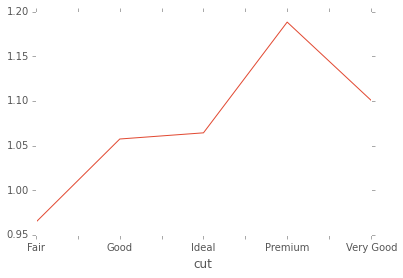

In [42]:
s = diamonds.groupby('cut').std()
s['x'].plot()
s


###Task 3: Import the "Kernmerkmale Bevölkerung (Geschlecht, Deutsche/Ausländer, 5 Altersgruppen)" data set

https://www.destatis.de/DE/PresseService/Presse/Pressekonferenzen/2013/Zensus2011/zensus_pk.html

download the excel file and use the `read_excel` method in pandas (hint: useful arguments are `sheetname`, `header` and `index_col`

In [46]:
b = pd.read_excel('demo_excel.xls;jsessionid=6F5BAE9844C77884D8C970391FAB6119.cae3', sheetname = 2, header = 3, index_col=1)

### Task 4: Create a new DataFrame containing only the "Bundesländer" (hint: use the corresponding SATZART key)

In [55]:
bund = b[b['SATZART']==10]
bund
bund.sort('EWZ')

,SATZART,NAME,EWZ,EW_M,EW_W,EW_D,EW_A,ALTER_1,ALTER_2,ALTER_3,ALTER_4,ALTER_5
AGS,,,,,,,,,,,,
4,10,Bremen,650863,316110,334750,580340,70520,98850,105260,181880,126940,137940
10,10,Saarland,999623,485380,514240,933360,66270,148980,135930,269470,224680,220560
13,10,Mecklenburg-Vorpommern,1609982,793310,816670,1582250,27730,215300,228240,434590,375550,356300
2,10,Hamburg,1706696,826140,880560,1495810,210890,267800,275420,537600,301700,324180
16,10,Thüringen,2188589,1076410,1112180,2155360,33230,286960,303570,587720,501650,508700
15,10,Sachsen-Anhalt,2287040,1116850,1170190,2247810,39230,290700,304600,610810,524660,556270
12,10,Brandenburg,2455780,1207850,1247920,2413580,42190,337040,309010,691800,562490,555430
1,10,Schleswig-Holstein,2800119,1360530,1439590,2683670,116450,477010,362390,790060,563490,607170
11,10,Berlin,3292365,1599840,1692530,2920090,372280,494150,535310,1004770,624090,634030


### Task 5: Plot the age composition of the different Bundesländer

ALTER_1
ALTER_2
ALTER_3
ALTER_4
ALTER_5
[u'ALTER_1', u'ALTER_2', u'ALTER_3', u'ALTER_4', u'ALTER_5']
[u'ALTER_1', u'ALTER_2', u'ALTER_3', u'ALTER_4', u'ALTER_5']


Index([u'SATZART', u'NAME', u'EWZ', u'EW_M', u'EW_W', u'EW_D', u'EW_A', u'ALTER_1', u'ALTER_2', u'ALTER_3', u'ALTER_4', u'ALTER_5'], dtype='object')

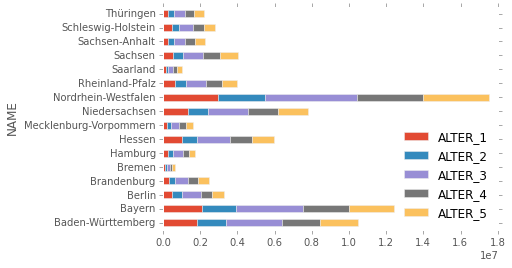

In [86]:
a = []
for alt in bund.columns:
    if 'ALTER_' in alt:
        print alt
        a.append(alt)
        
print a

b = [alt for alt in bund.columns if 'ALTER' in alt]
print b
alter = bund.groupby(['NAME'])[a].sum()
alter
alter.plot(kind = 'barh', stacked = True)
bund.columns


### Task 6: ...and now relative to the population in each Bundesland

,ALTER_1,ALTER_2,ALTER_3,ALTER_4,ALTER_5
NAME,,,,,
Schleswig-Holstein,0.170353,0.129419,0.282152,0.201238,0.216837
Hamburg,0.156911,0.161376,0.314995,0.176774,0.189946
Niedersachsen,0.174386,0.134873,0.281328,0.201785,0.207629
Bremen,0.151875,0.161724,0.279444,0.195033,0.211934
Nordrhein-Westfalen,0.170179,0.141489,0.284706,0.201025,0.202601
Hessen,0.168401,0.139708,0.292445,0.201808,0.197638
Rheinland-Pfalz,0.166489,0.140917,0.278084,0.210922,0.203586
Baden-Württemberg,0.176752,0.147568,0.285859,0.195811,0.194010
Bayern,0.170371,0.145009,0.291445,0.198374,0.194801


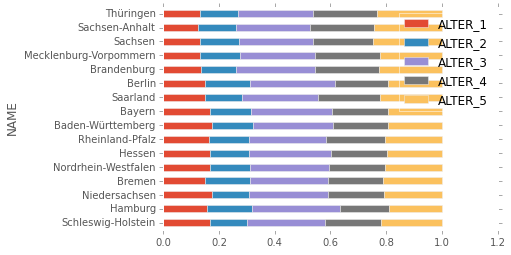

In [131]:
b = [alt for alt in bund.columns if 'ALTER' in alt]
bund.index = bund['NAME']
rel = bund[b].div(bund['EWZ'], axis=0)
rel.plot(kind = 'barh', stacked = True)
rel

### Task 7: Plot pie charts of the relative age distribution in Berlin and Sachsen

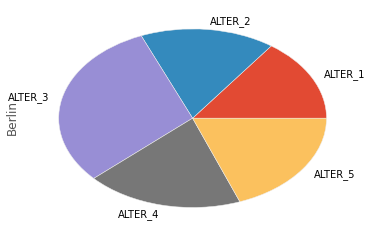

In [143]:

ber = rel.loc['Berlin']
ber
ber.plot(kind='pie')


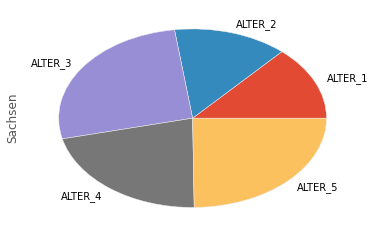

In [146]:
sac = rel.loc['Sachsen']
sac
sac.plot(kind='pie')

###Task 8: Import a health care data set from Zeit online 

The file is in the git repository: `multiresistente_keime.xlsx`. Import it using the `read_excel` function.


### Task 9: Merge the two data sets (hint: "Kreisschlüssel" is the same as "AGS")

###  Task 10: Plot number of hospitalized patients per inhabitant against relative number of old people (65+)

### Task 11: Compute the correlation